# Title

Parkinson Speech Dataset with Multiple Types of Sound Recordings 

https://archive.ics.uci.edu/ml/datasets/Parkinson+Speech+Dataset+with++Multiple+Types+of+Sound+Recordings

## Description

Parkinson’s disease is a disorder that causes long term degeneration of the central nervous system and degrades the motor system. It is caused due to lack of dopamine in the mid brain due to the death of cells from substantia nigra.

At early stages, the most prevalent symptoms include tremors, rigidity, bradykinesia and hindered movement. As the disease worsens, neuropsychiatric, autonomic and sensory disturbances emerge. Advanced stage symptoms include postural instability, cognitive and behavioral disorders, the most common being dementia, depression, anxiety, punding and sleep disorders.


## Diagnosis

A physician will initially assess for Parkinson's disease with a careful medical history and neurological examination.People may be given levodopa, with any resulting improvement in motor impairment helping to confirm the PD diagnosis. The finding of Lewy bodies in the midbrain on autopsy is usually considered final proof that the person had PD.

Computed tomography (CT) scans of people with PD usually appear normal.MRI has become more accurate in diagnosis of the disease over time, specifically through iron-sensitive T2* and SWI sequences at a magnetic field strength of at least 3T, both of which can demonstrate absence of the characteristic 'swallow tail' imaging pattern in the dorsolateral substantia nigra.


## Experiment

The training data belongs to 20 PWP (6 female, 14 male) and 20 healthy individuals (10 female, 10 male) who appealed at the Department of Neurology in Cerrahpasa Faculty of Medicine, Istanbul University. From all subjects, multiple types of sound recordings (26 voice samples including sustained vowels, numbers, words and short sentences) are taken. A group of 26 linear and time frequency based features are extracted from each voice sample.

After collecting the training dataset which consists of multiple types of sound recordings and performing our experiments, in line with the obtained findings we continued collecting an independent test set from PWP via the same physician’s examination process under the same conditions. During the collection of this dataset, 28 PD patients are asked to say only the sustained vowels 'a' and 'o' three times respectively which makes a total of 168 recordings. The same 26 features are extracted from voice samples of this dataset. This dataset can be used as an independent test set to validate the results obtained on training set.

## Subjects

Each subject has 26 voice samples including sustained vowels, numbers, words and short 
sentences. The voice samples in the training data file are given in the 
following order: 

sample# - corresponding voice samples 


1: sustained vowel (aaaâ€¦â€¦) 

2: sustained vowel (oooâ€¦...) 

3: sustained vowel (uuuâ€¦...) 

4-13: numbers from 1 to 10 

14-17: short sentences 

18-26: words 

## Attribute Information

column 1: Subject id 

column 2-27: features 

column 28: UPDRS 

column 29: class information 

features 1-5: Jitter (local),Jitter (local, absolute),Jitter (rap),Jitter (ppq5),Jitter (ddp), 

features 6-11: Shimmer (local),Shimmer (local, dB),Shimmer (apq3),Shimmer (apq5), Shimmer (apq11),Shimmer (dda)

features 12-14: AC,NTH,HTN, 

features 15-19: Median pitch, Mean pitch, Standard deviation, Minimum pitch, Maximum pitch, 

features 20-23: Number of pulses, Number of periods, Mean period, Standard deviation of period, features 24-26: Fraction of locally unvoiced frames, Number of voice breaks, Degree of voice breaks 



Jitter and shimmer are the two common perturbation measures in acoustic analysis. Jitter is a measure of frequency instability, while shimmer is a measure of amplitude instability. A normal voice has a small amount of instability during sustained vowel production.
Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale
The speech in a particular frame is then declared to be voiced if its average power exceeds a threshold level that is chosen by the user. Otherwise it is declared unvoiced.
Voice break generally refers to transitions between different vocal registers of the human voice.
UPDRS: The unified Parkinson's disease rating scale is used to follow the longitudinal course of Parkinson's disease. 


## Related papers And References

Erdogdu Sakar, B., Isenkul, M., Sakar, C.O., Sertbas, A., Gurgen, F., Delil, S., Apaydin, H., Kursun, O., 'Collection and Analysis of a Parkinson Speech Dataset with Multiple Types of Sound Recordings'

IEEE Journal of Biomedical and Health Informatics, vol. 17(4), pp. 828-834, 2013

UCI Machine Learning Repository

Wikipedia


## Analysis

 


We treat this data set as a classification problem. The data had already been divided into test and training data sets.


In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt 
from sklearn import metrics
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


In [3]:
df= pd.read_excel (r'F:\Internship\CDRI\Project\Parkinson Multiple Sound Recording\train_data.xlsx')
#df_test= pd.read_excel (r'F:\Internship\CDRI\Project\Parkinson Multiple Sound Recording\test_data.xlsx')
X= df.iloc[:,1:27]
#X_t= df_test.iloc[:,1:27]
y=df.iloc[:,-1]
#y_t=df_test.iloc[:,-1]

In [4]:
X_tn,X_ts,y_train,y_test=train_test_split(X,y,test_size=0.30)


In [5]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_tr = sc.fit_transform(X_tn) 
X_te = sc.transform(X_ts) 


C:\Users\Piu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Piu\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Piu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 6)
fit= pca.fit(X)
print("Num Features: %d" % fit.n_components_)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
X_train = pca.fit_transform(X_tr)
X_test = pca.transform(X_te)

Num Features: 6
Explained Variance: [0.64558392 0.26260677 0.06897347 0.00858425 0.00599246 0.00339096]


###### The above row represents the amount of variance that can be explained by the six most suitable features chosen by the PCA.

In [8]:
cor= X.corr()

In [10]:
cols=df.columns

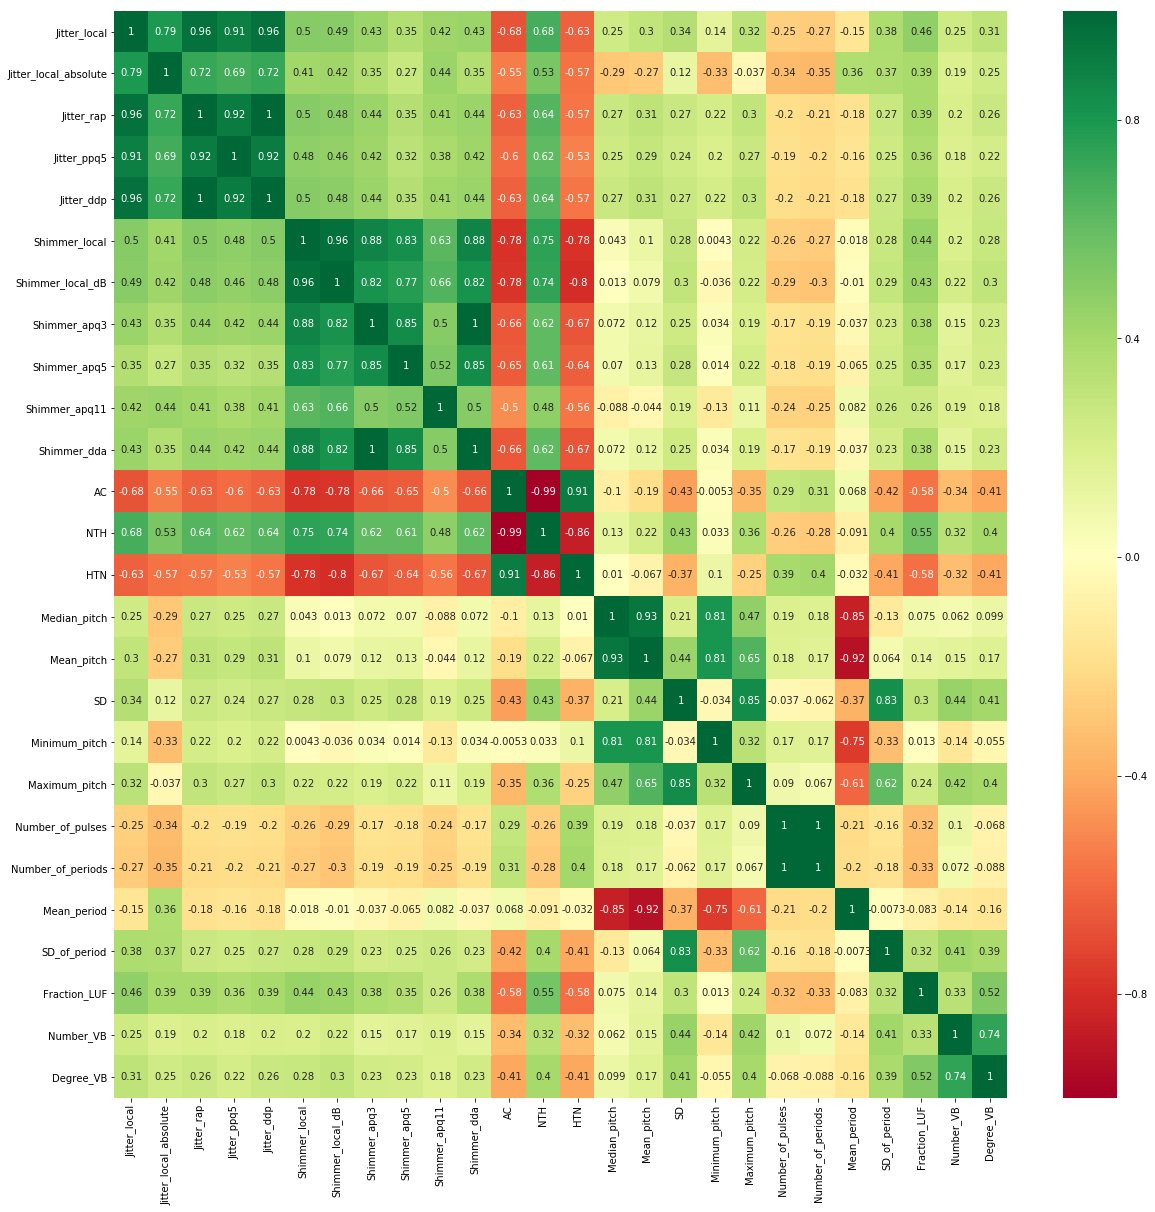

In [11]:
top_corr_features = cor.index
plt.figure(figsize=(20,20))
sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")



###### The correlation matrix gives us the correlation coefficients between variables. Some variables are highly correlated and may lead to multicollinearity. This is why we use the principal component analysis to select features best suited and uncorrelated. 

C:\Users\Piu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03565976 0.04637399 0.04128698 0.04120332 0.04460818 0.03689353
 0.04606794 0.03015024 0.04235269 0.05107044 0.03067171 0.0292391
 0.02968828 0.04142029 0.04619664 0.03824601 0.03637885 0.03706822
 0.05194389 0.03267941 0.03518577 0.03559938 0.03564037 0.04261617
 0.02290706 0.03885179]


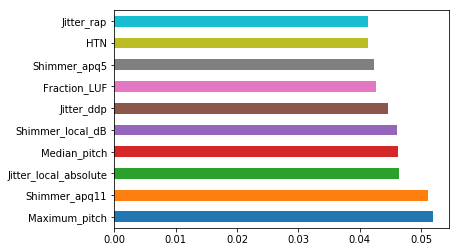

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


###### The above chart highlights the ten most important variables and the coefficients indicates the ratio of impact they have on the prediction of the class value.


In [13]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (train): ",gb_clf.score(X_train, y_train))
    print("Accuracy score (test): ",gb_clf.score(X_test, y_test))
    

Learning rate:  0.05
Accuracy score (train):  0.6771978021978022
Accuracy score (test):  0.6346153846153846
Learning rate:  0.075
Accuracy score (train):  0.6785714285714286
Accuracy score (test):  0.625
Learning rate:  0.1
Accuracy score (train):  0.6881868131868132
Accuracy score (test):  0.625
Learning rate:  0.25
Accuracy score (train):  0.7184065934065934
Accuracy score (test):  0.6538461538461539
Learning rate:  0.5
Accuracy score (train):  0.7541208791208791
Accuracy score (test):  0.6346153846153846
Learning rate:  0.75
Accuracy score (train):  0.7774725274725275
Accuracy score (test):  0.6410256410256411
Learning rate:  1
Accuracy score (train):  0.7967032967032966
Accuracy score (test):  0.6153846153846154


##### With a learning rate of 1, there is a 79.67% chance of making correct predictions for new subjects and a 77.74% chance with a learning rate of 0.75.Hence with either of these learning rates, there is a high probability of the new cases being accurately classified.


C:\Users\Piu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.5961538461538461
Precision: 0.6309523809523809
Recall: 0.6235294117647059


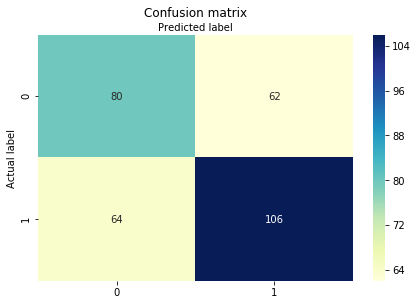

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

###### Logistic regression gives us an accuracy of 59.6%

In [18]:
#y_test= np.array(y_test)
#y_test.reshape(1,-1)

In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

C:\Users\Piu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6987179487179487
Precision: 0.6979166666666666
Recall: 0.788235294117647


###### Support vector machine algorithm gives an accuracy of  69.87%.